In [2]:




import numpy as np 
import pandas as pd


import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix




from sklearn.model_selection import train_test_split 



%matplotlib inline

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:

salary_dataset  = pd.read_csv("F:\data\\adult.csv")


salary_dataset.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:

salary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:

salary_dataset.isnull().sum()


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
salary_dataset.shape

(48842, 15)

In [7]:

df = pd.DataFrame(salary_dataset)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
df.shape

(48842, 15)

In [9]:

df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [10]:

df.isin(['?']).sum(axis=0)


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
country             857
income                0
dtype: int64

In [11]:

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [12]:

df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

In [13]:

df.dropna(how='any',inplace=True)

In [15]:
df.shape

(45222, 15)

In [16]:

df.isin(['?']).sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital            0
occupation         0
relationship       0
race               0
gender             0
capital gain       0
capital loss       0
hours per week     0
country            0
income             0
dtype: int64

In [17]:

for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
86       1
87       1
89       1
Name: age, Length: 74, dtype: int64
---- workclass ---
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
---- fnlwgt ---
203488    21
125892    18
120277    18
113364    17
126569    17
          ..
88440      1
176517     1
194956     1
201105     1
208174     1
Name: fnlwgt, Length: 26741, dtype: int64
---- education ---
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int

In [18]:

df.workclass.value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [19]:

df.occupation.value_counts()

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: occupation, dtype: int64

In [20]:

df.country.value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [22]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital,occupation,relationship,race,gender,capital gain,capital loss,hours per week,country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [23]:
df.shape

(45222, 15)

In [24]:

df.drop(['educational-num', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)


In [25]:
df.shape

(45222, 10)

In [26]:
df.head()

,age,workclass,education,marital,occupation,relationship,race,gender,hours per week,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,>50K
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,30,<=50K


In [27]:

income = set(df['income'])
print(income)

{'<=50K', '>50K'}


In [28]:

df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [29]:
#check the data is replaced 
df.head()

,age,workclass,education,marital,occupation,relationship,race,gender,hours per week,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,1
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,30,0


In [30]:
gender = set(df['gender'])
print(gender)

{'Female', 'Male'}


In [31]:

df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [32]:

race = set(df['race'])
print(race)

{'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'White', 'Other', 'Black'}


In [33]:

df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
                                             'Amer-Indian-Eskimo': 4}).astype(int)

In [34]:

Marital = set(df['marital'])
print(Marital)

{'Widowed', 'Divorced', 'Married-spouse-absent', 'Married-civ-spouse', 'Married-AF-spouse', 'Never-married', 'Separated'}


In [35]:

df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
                                                             'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4, 
                                                             'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [36]:

emp = set(df['workclass'])
print(emp)

{'Private', 'Self-emp-not-inc', 'Federal-gov', 'Self-emp-inc', 'Local-gov', 'State-gov', 'Without-pay'}


In [37]:

df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1, 
                                                             'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4, 
                                                             'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

In [38]:

ed = set(df['education'])
print(ed)

{'Doctorate', 'Preschool', 'Bachelors', 'Masters', '11th', '9th', 'Prof-school', '1st-4th', 'Assoc-voc', '5th-6th', '10th', '12th', 'Some-college', 'HS-grad', '7th-8th', 'Assoc-acdm'}


In [39]:

df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, 
                                                        '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, 
                                                        '12th': 5, '7th-8th': 6, 'Prof-school': 7,
                                                        '1st-4th': 8, 'Assoc-acdm': 9,
                                                        'Doctorate': 10, '11th': 11,
                                                        'Bachelors': 12, '10th': 13,
                                                        'Assoc-voc': 14,
                                                        '9th': 15}).astype(int)

In [40]:

occupation = set(df['occupation'])
print(occupation)

{'Protective-serv', 'Machine-op-inspct', 'Farming-fishing', 'Handlers-cleaners', 'Tech-support', 'Prof-specialty', 'Adm-clerical', 'Sales', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Other-service', 'Priv-house-serv', 'Transport-moving'}


In [41]:

df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 
                                          'Adm-clerical': 3, 'Handlers-cleaners': 4, 
                                         'Prof-specialty': 5,'Machine-op-inspct': 6, 
                                         'Exec-managerial': 7, 
                                         'Priv-house-serv': 8,
                                         'Craft-repair': 9, 
                                         'Sales': 10, 
                                         'Transport-moving': 11, 
                                         'Armed-Forces': 12, 
                                         'Other-service': 13,  
                                         'Protective-serv': 14}).astype(int)

In [42]:

relationship = set(df['relationship'])
print(relationship)

{'Wife', 'Own-child', 'Not-in-family', 'Husband', 'Unmarried', 'Other-relative'}


In [43]:
#Mapping the values to numerical values
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 
                                                             'Other-relative': 2, 
                                                             'Unmarried': 3, 
                                                             'Husband': 4, 
                                                             'Own-child': 5}).astype(int)

In [44]:

df.head(10)
#Now below we see all the data is numerical data that is proper for our data feature analysis 

,age,workclass,education,marital,occupation,relationship,race,gender,hours per week,income
0,25,5,11,5,6,5,0,0,40,0
1,38,5,3,2,1,4,3,0,50,0
2,28,4,9,2,14,4,3,0,40,1
3,44,5,0,2,6,4,0,0,40,1
5,34,5,13,5,13,0,3,0,30,0
7,63,6,7,2,5,4,3,0,32,1
8,24,5,0,5,13,3,3,1,40,0
9,55,5,6,2,9,4,3,0,10,0
10,65,5,3,2,6,4,3,0,40,1
11,36,2,12,2,3,4,3,0,40,0


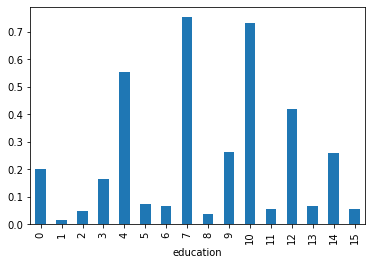

In [45]:

df.groupby('education').income.mean().plot(kind='bar')

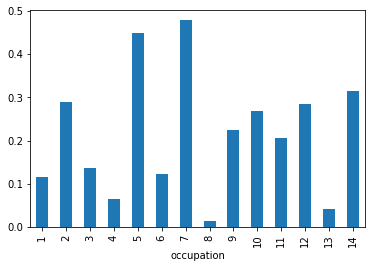

In [46]:
#plotting a bar graph for Occupation against Income to see the co-relation between these columns 
df.groupby('occupation').income.mean().plot(kind='bar')

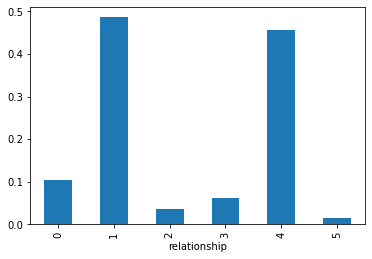

In [47]:
#plotting a bar graph for Relationship against Income to see the co-relation between these columns 
df.groupby('relationship').income.mean().plot(kind='bar')

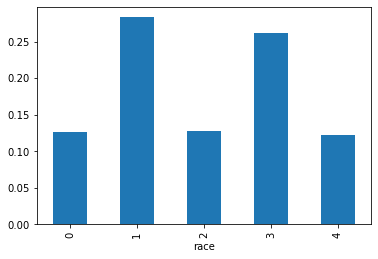

In [48]:
#plotting a bar graph for Race against Income to see the co-relation between these columns 
df.groupby('race').income.mean().plot(kind='bar')

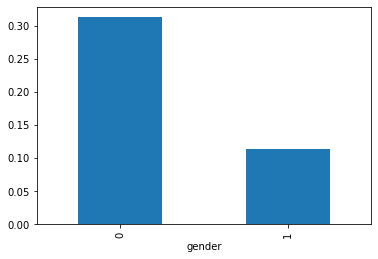

In [49]:
#plotting a bar graph for Race against Income to see the co-relation between these columns 
df.groupby('gender').income.mean().plot(kind='bar')

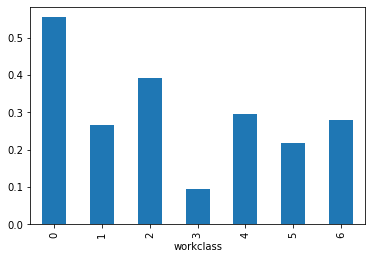

In [50]:
#plotting a bar graph for Race against Income to see the co-relation between these columns 
df.groupby('workclass').income.mean().plot(kind='bar')

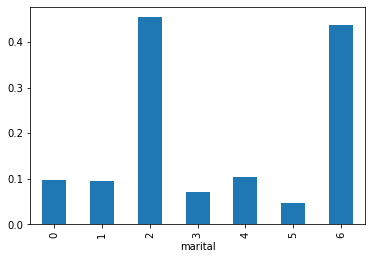

In [51]:
#plotting a bar graph for Race against Income to see the co-relation between these columns 
df.groupby('marital').income.mean().plot(kind='bar')

In [ ]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
corrmat = df.corr()
f, ax = pplt.subplots(figsize=(12, 9))
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'income')['income'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

#below we see that there is relation between Relationship, Education, Race, Occupation and Income which is our target 
#columns to predict so, doing more feature analysis on these columns 

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [53]:
x=df.drop(['income'],axis=1)
y=df.income

In [56]:
model=SelectKBest(chi2,k=9)
feature=model.fit(x,y)
feature

SelectKBest(k=9, score_func=<function chi2 at 0x00000260B998E048>)

In [57]:
feature.scores_

array([11516.11726792,   281.94275528,  2415.17942478,  3995.49946324,
         196.9247153 ,  1104.24316905,    91.98545779,  1421.11046247,
        8221.14902988])

In [59]:
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
max_score=0
for i in  range(42,100):
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    svc=RandomForestClassifier(n_estimators=50)
    mod=svc.fit(x,y)
    sco=svc.score(X_test,y_test)
    if sco>=max_score:
        max_score=sco
        best_state=i
print()
print()
print(max_score,best_state)



0.9609729132117192 83


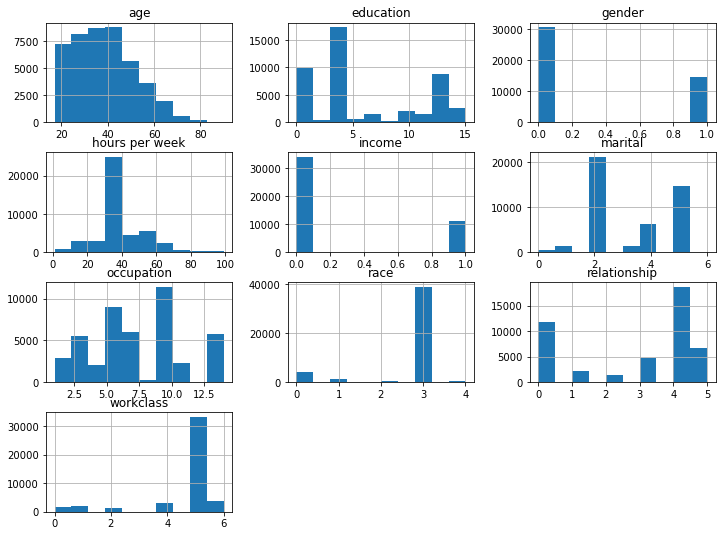

In [60]:
# Plot histogram for each numeric variable/attribute of the dataset

df.hist(figsize=(12,9))
pplt.show()

In [65]:
X_test

,age,workclass,education,marital,occupation,relationship,race,gender,hours per week
46060,42,5,14,2,13,4,3,0,45
14511,59,5,3,4,7,2,3,1,45
13303,48,6,12,2,7,4,3,0,60
10952,44,5,9,2,9,4,3,0,40
36413,48,2,3,2,11,4,0,0,40
...,...,...,...,...,...,...,...,...,...
29842,34,5,12,2,7,4,3,0,48
38524,35,5,5,5,10,0,0,1,40
13403,31,5,3,4,10,0,3,1,34
29404,43,4,4,2,7,4,3,0,40


In [67]:
y_pred=svc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [71]:

from sklearn.metrics import confusion_matrix,f1_score,classification_report
mat=confusion_matrix(y_test,y_pred)

In [72]:
mat

array([[6645,  171],
       [ 225, 2004]], dtype=int64)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6816
           1       0.92      0.90      0.91      2229

    accuracy                           0.96      9045
   macro avg       0.94      0.94      0.94      9045
weighted avg       0.96      0.96      0.96      9045



In [76]:
import pickle

In [77]:
file= open('salary.pkl','wb')
pickle.dump(svc,file)